In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset from seaborn library
df=sns.load_dataset('titanic')
df.shape

(891, 15)

# Preprocessing Steps

In [3]:
#  checking missing values
# if var>25% drop it

df.isnull().sum()*100/len(df)

# its clear that 'age', 'embarked', 'embark_town' have missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [4]:
# drop 'deck' column

df.drop(['deck'],axis=1,inplace=True)

In [5]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [6]:
# fill null values with median
df.loc[df['age'].isnull(),['age']] = df['age'].median()

In [7]:
# Its object datatype so use 'mode'or most frequent character 'S' to fillNull places
df['embark_town'].value_counts()
df['embarked']=df['embarked'].fillna('S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [8]:
# since 'embarked' is short form of 'embark_town' values, drop 'embark_town' 

df.drop(['embark_town'],axis=1,inplace=True)
df.isnull().sum()*100/len(df)

survived      0.0
pclass        0.0
sex           0.0
age           0.0
sibsp         0.0
parch         0.0
fare          0.0
embarked      0.0
class         0.0
who           0.0
adult_male    0.0
alive         0.0
alone         0.0
dtype: float64

In [9]:
# 'survived' and 'alive' are similar which can cause multicollinearity so heve to drop
df.drop(['alive'],axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [10]:
# describe the object variable
df.describe(include='O')

,sex,embarked,who
count,891,891,891
unique,2,3,3
top,male,S,man
freq,577,646,537


In [11]:
# 'pclass' & 'class' are same
df['class'].value_counts(), df['pclass'].value_counts()

# drop 'pclass' because creates confusion
# 'alone' beacause we have parent and child column
df.drop(['pclass','alone'],inplace=True,axis=1)
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True


In [12]:
# drop adult as well beacause its replication of 'who' column man or not

df.drop('adult_male',axis=1,inplace=True)
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who
0,0,male,22.0,1,0,7.2500,S,Third,man
1,1,female,38.0,1,0,71.2833,C,First,woman
2,1,female,26.0,0,0,7.9250,S,Third,woman
3,1,female,35.0,1,0,53.1000,S,First,woman
4,0,male,35.0,0,0,8.0500,S,Third,man


In [13]:
# Now 'who'column also not required because 'sex'&'age' column represents the 'who' variable
df.drop(['who','fare'],axis=1,inplace=True)
df.head(7)

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third
5,0,male,28.0,0,0,Q,Third
6,0,male,54.0,0,0,S,First


In [14]:
df.info()
# It seems we dont have any null values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [15]:
# convert objects to numeric column
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
df

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,S,Third
1,1,0,38.0,1,0,C,First
2,1,0,26.0,0,0,S,Third
3,1,0,35.0,1,0,S,First
4,0,1,35.0,0,0,S,Third
...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,S,Second
887,1,0,19.0,0,0,S,First
888,0,0,28.0,1,2,S,Third
889,1,1,26.0,0,0,C,First


In [16]:
df=pd.get_dummies(df,columns=['class'])
df.head()

,survived,sex,age,sibsp,parch,embarked,class_First,class_Second,class_Third
0,0,1,22.0,1,0,S,0,0,1
1,1,0,38.0,1,0,C,1,0,0
2,1,0,26.0,0,0,S,0,0,1
3,1,0,35.0,1,0,S,1,0,0
4,0,1,35.0,0,0,S,0,0,1


In [17]:
df['embarked']=df['embarked'].astype('category')
df['embarked']=df['embarked'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,embarked,class_First,class_Second,class_Third
0,0,1,22.0,1,0,2,0,0,1
1,1,0,38.0,1,0,0,1,0,0
2,1,0,26.0,0,0,2,0,0,1
3,1,0,35.0,1,0,2,1,0,0
4,0,1,35.0,0,0,2,0,0,1


In [18]:
df=pd.get_dummies(df,columns=['embarked'])
df.head()

,survived,sex,age,sibsp,parch,class_First,class_Second,class_Third,embarked_0,embarked_1,embarked_2
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,0,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,1,0,0,0,0,1
4,0,1,35.0,0,0,0,0,1,0,0,1


In [19]:
df.drop(['embarked_0','class_First'],axis=1,inplace=True)
df.head(7)

,survived,sex,age,sibsp,parch,class_Second,class_Third,embarked_1,embarked_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,0,0,1
4,0,1,35.0,0,0,0,1,0,1
5,0,1,28.0,0,0,0,1,1,0
6,0,1,54.0,0,0,0,0,0,1


In [20]:
# since 'age' variable have max=80year old and min=4month old
# No Outliers at this dataset
df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [21]:
# feature scaling is not required as most of the data is in binary format and max age is 80
# Now Imbalance dataset chack

df['survived'].value_counts()

# class_0 < 2*class_1  
# no imbalance data

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

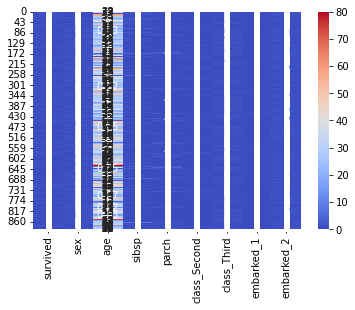

In [22]:
sns.heatmap(df,annot=True,cmap='coolwarm')

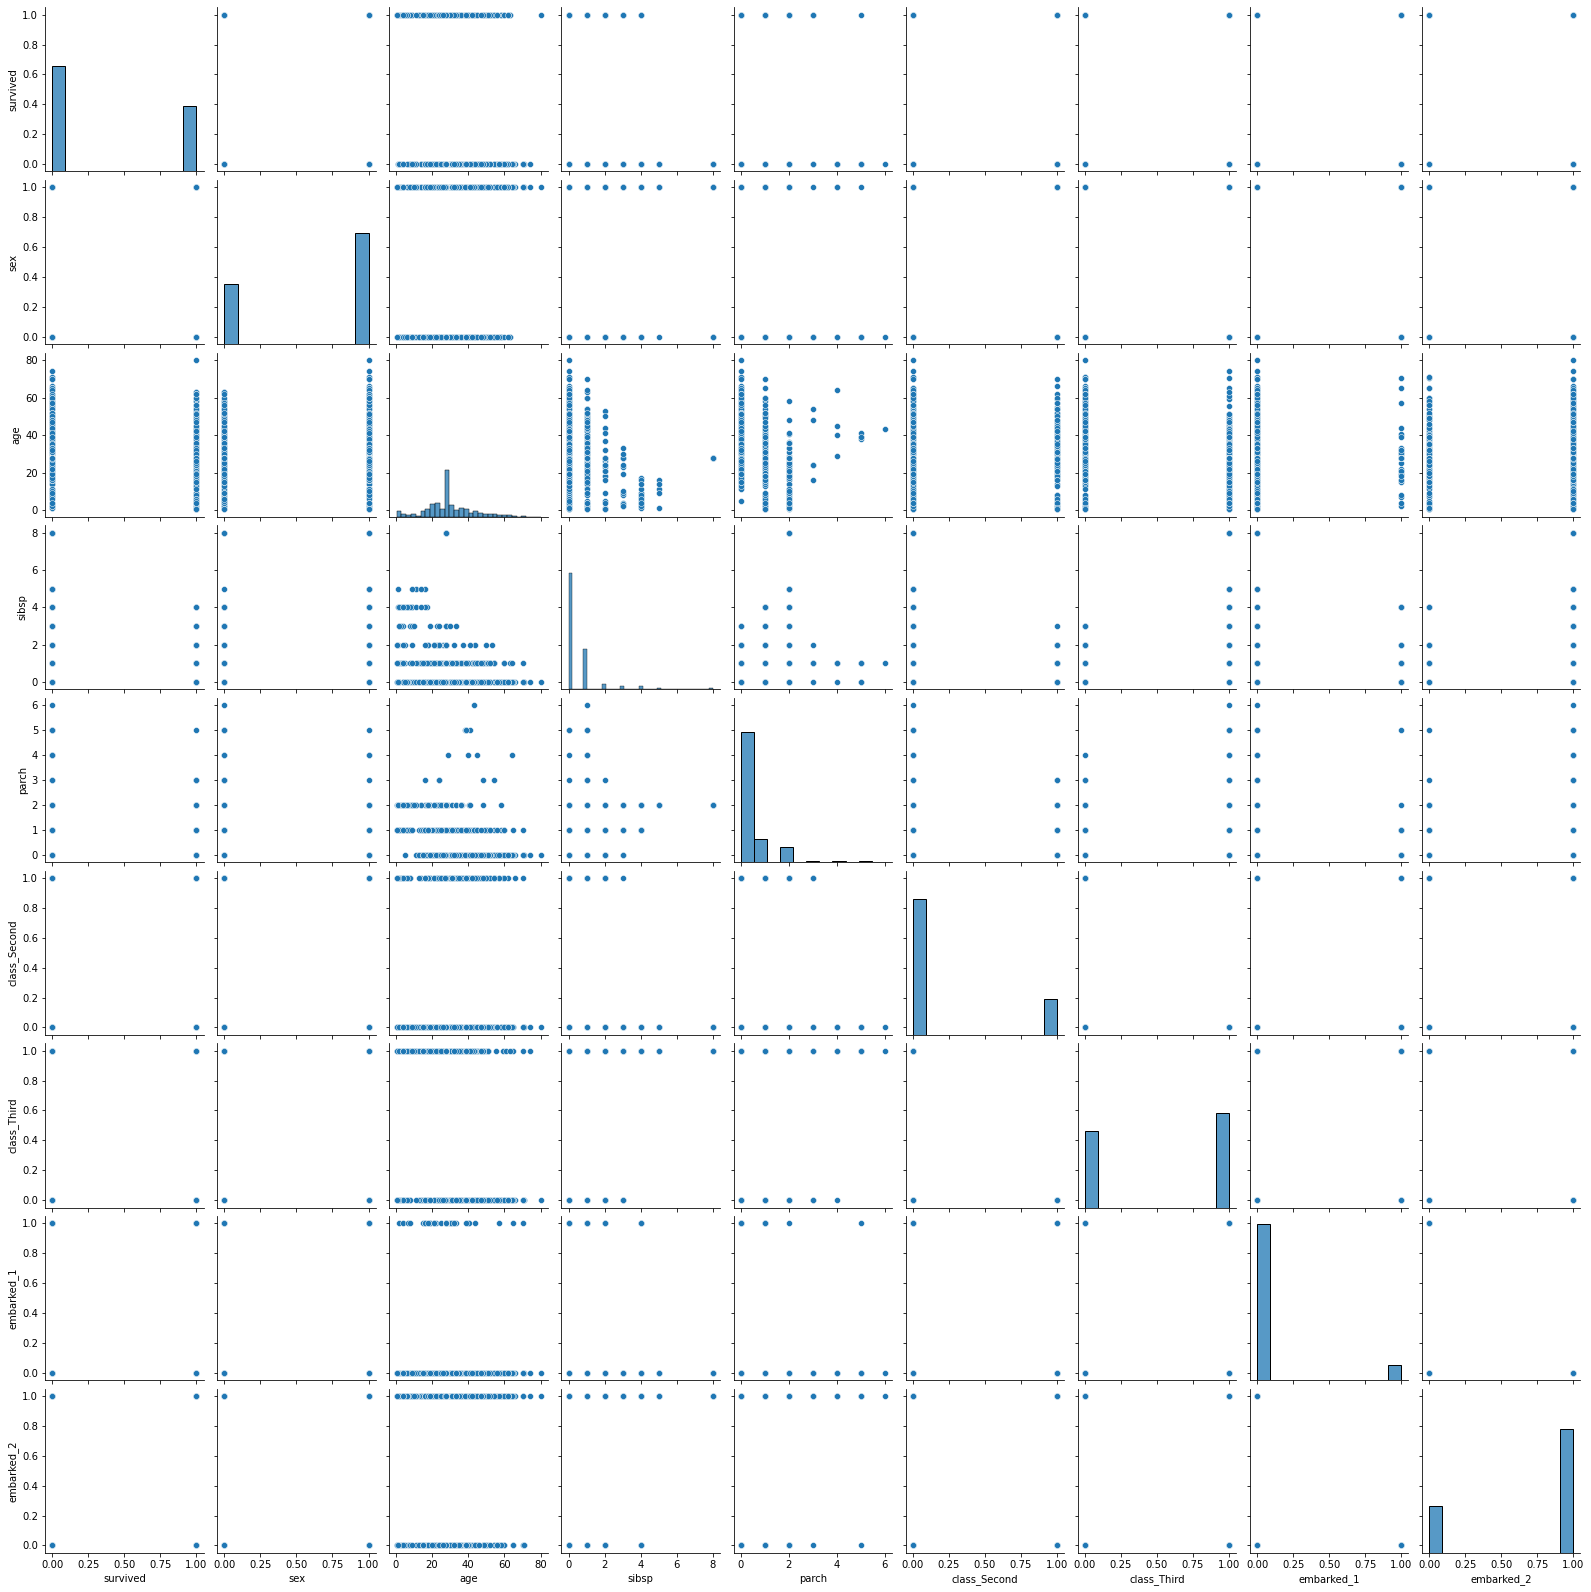

In [23]:
sns.pairplot(df)

In [24]:
# make x and y feature dataset

xfeature = df.iloc[:,1:].values
yfeature = df['survived'].values

In [25]:
# spliting the data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xfeature,yfeature, test_size=0.25,random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(668, 8) (223, 8) (668,) (223,)


### Logistic model biulding

In [26]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg.fit(xtrain,ytrain)


LogisticRegression()

In [27]:
ypred = logit_reg.predict(xtest)
ypred, ytest

(array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
      

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print('confusion_matrix:\n', confusion_matrix(ytest,ypred))
print("\nclassification_report:\n", classification_report(ytest,ypred))
print('accuracy_score',accuracy_score(ytest,ypred)) 


confusion_matrix:
 [[114  14]
 [ 29  66]]

classification_report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.82      0.69      0.75        95

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223

accuracy_score 0.8071748878923767


In [29]:
ypred_train = logit_reg.predict(xtrain)


In [30]:
accuracy_score(ytrain,ypred_train)

0.8098802395209581

#### acccuracy score is test result : 80.71%
#### accuracy score for train result : 80.98%
So this model is rightly fit 

In [31]:
# ROC-AUC Curve

from sklearn.metrics import roc_curve
tpr,fpr,threshold = roc_curve(ytest,ypred)
display(tpr[:10])
display(fpr[:10])
display(threshold[:10])

array([0.      , 0.109375, 1.      ])

array([0.        , 0.69473684, 1.        ])

array([2, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import roc_auc_score
logistic_curve = roc_auc_score(ytest,ypred)
logistic_curve

0.7926809210526315

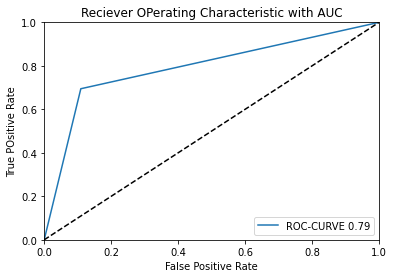

In [33]:
# ROC-AUC plot
plt.figure()
plt.plot(tpr,fpr,label='ROC-CURVE %0.2f'%logistic_curve)
plt.plot([0,1.0],[0,1.0],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True POsitive Rate')
plt.title('Reciever OPerating Characteristic with AUC')
plt.legend(loc='lower right')
plt.show()


In [34]:
# Using K-Fold improoving the accuracy
from sklearn.model_selection import cross_val_score
acuracy_train = cross_val_score(logit_reg,xtrain,ytrain,cv=15)
acuracy_test = cross_val_score(logit_reg,xtest,ytest,cv=15)

print('accuracyTrain:',acuracy_train)
print('accuracyTest:',acuracy_test)

o:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
o:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

accuracyTrain: [0.66666667 0.77777778 0.75555556 0.84444444 0.8        0.77777778
 0.93333333 0.82222222 0.90909091 0.81818182 0.81818182 0.84090909
 0.84090909 0.72727273 0.81818182]
accuracyTest: [0.8        0.73333333 0.66666667 0.73333333 0.6        0.8
 0.8        0.73333333 1.         0.73333333 0.8        0.8
 0.86666667 0.78571429 0.78571429]


o:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print('Test Accuracy:',acuracy_test[8])

Test Accuracy: 1.0


Test dataset for validation

In [36]:
# get test file 
testfile=pd.read_csv('test.csv')
testfile

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
# make columns as per the train dataset
testfile.columns
testfile=testfile[['Sex','Age','SibSp','Parch','Embarked',"Pclass"]]
testfile.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [38]:
# check missing data there is not

testfile.isna().sum()


Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
Pclass       0
dtype: int64

In [39]:
# use age median to fill null values
testfile['Age'] = testfile['Age'].fillna(testfile['Age'].median())
testfile.head()

C:\Users\KIRAN Sonkamble\AppData\Local\Temp\ipykernel_18732\1817877121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testfile['Age'] = testfile['Age'].fillna(testfile['Age'].median())


,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [40]:
# convert it into one hot encoding
testfile['Sex']=testfile['Sex'].astype('category')
testfile['Sex']= testfile['Sex'].cat.codes
testfile.head()

C:\Users\KIRAN Sonkamble\AppData\Local\Temp\ipykernel_18732\3722301273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testfile['Sex']=testfile['Sex'].astype('category')
C:\Users\KIRAN Sonkamble\AppData\Local\Temp\ipykernel_18732\3722301273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testfile['Sex']= testfile['Sex'].cat.codes


,Sex,Age,SibSp,Parch,Embarked,Pclass
0,1,34.5,0,0,Q,3
1,0,47.0,1,0,S,3
2,1,62.0,0,0,Q,2
3,1,27.0,0,0,S,3
4,0,22.0,1,1,S,3


In [41]:
testfile['Embarked']=testfile['Embarked'].astype('category')
testfile['Embarked']=testfile['Embarked'].cat.codes
testfile = pd.get_dummies(testfile,columns=['Embarked'])
testfile.head(8)

C:\Users\KIRAN Sonkamble\AppData\Local\Temp\ipykernel_18732\2517020649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testfile['Embarked']=testfile['Embarked'].astype('category')
C:\Users\KIRAN Sonkamble\AppData\Local\Temp\ipykernel_18732\2517020649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testfile['Embarked']=testfile['Embarked'].cat.codes


,Sex,Age,SibSp,Parch,Pclass,Embarked_0,Embarked_1,Embarked_2
0,1,34.5,0,0,3,0,1,0
1,0,47.0,1,0,3,0,0,1
2,1,62.0,0,0,2,0,1,0
3,1,27.0,0,0,3,0,0,1
4,0,22.0,1,1,3,0,0,1
5,1,14.0,0,0,3,0,0,1
6,0,30.0,0,0,3,0,1,0
7,1,26.0,1,1,2,0,0,1


In [42]:
testfile['Pclass']=testfile['Pclass'].astype('category')
testfile['Pclass']=testfile['Pclass'].cat.codes
testfile= pd.get_dummies(testfile,columns=['Pclass'])
testfile.head(8)

,Sex,Age,SibSp,Parch,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2
0,1,34.5,0,0,0,1,0,0,0,1
1,0,47.0,1,0,0,0,1,0,0,1
2,1,62.0,0,0,0,1,0,0,1,0
3,1,27.0,0,0,0,0,1,0,0,1
4,0,22.0,1,1,0,0,1,0,0,1
5,1,14.0,0,0,0,0,1,0,0,1
6,0,30.0,0,0,0,1,0,0,0,1
7,1,26.0,1,1,0,0,1,0,1,0


In [43]:
testfile.drop(['Pclass_0','Embarked_0'],axis=1, inplace=True)
testfile

,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_1,Pclass_2
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...
413,1,27.0,0,0,0,1,0,1
414,0,39.0,0,0,0,0,0,0
415,1,38.5,0,0,0,1,0,1
416,1,27.0,0,0,0,1,0,1


In [44]:
# check the sequence and columns names in the both the dataset
print(df.columns)
print('***'*33)
testfile.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'class_Second',
       'class_Third', 'embarked_1', 'embarked_2'],
      dtype='object')
***************************************************************************************************


Index(['Sex', 'Age', 'SibSp', 'Parch', 'Embarked_1', 'Embarked_2', 'Pclass_1',
       'Pclass_2'],
      dtype='object')

In [45]:
# chaange order of columns
testfile = testfile[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass_1','Pclass_2','Embarked_1', 'Embarked_2']]
testfile.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_1,Embarked_2
0,1,34.5,0,0,0,1,1,0
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [46]:
# change column as per the training dataset

column_names = ['sex', 'age', 'sibsp', 'parch', 'class_Second','class_Third', 'embarked_1', 'embarked_2']
testfile.columns=column_names
testfile.head()

,sex,age,sibsp,parch,class_Second,class_Third,embarked_1,embarked_2
0,1,34.5,0,0,0,1,1,0
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [47]:
# predict the model using testfile dataset with logit model

y_pred_testdataset = logit_reg.predict(testfile)
y_pred_testdataset

o:\New folder\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
# combine test dataset and result
y_pred_testdataset = pd.DataFrame(y_pred_testdataset)
testfile = pd.concat([testfile,y_pred_testdataset],axis=1)
testfile

,sex,age,sibsp,parch,class_Second,class_Third,embarked_1,embarked_2,0
0,1,34.5,0,0,0,1,1,0,0
1,0,47.0,1,0,0,1,0,1,0
2,1,62.0,0,0,1,0,1,0,0
3,1,27.0,0,0,0,1,0,1,0
4,0,22.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
413,1,27.0,0,0,0,1,0,1,0
414,0,39.0,0,0,0,0,0,0,1
415,1,38.5,0,0,0,1,0,1,0
416,1,27.0,0,0,0,1,0,1,0


In [49]:
testfile = testfile.rename(columns={0:'survived'})

In [50]:
# If client ask file do this and share

newfile = pd.read_csv('test.csv')
newfile.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
newfile = pd.concat([newfile,testfile],axis=1)
newfile

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,age,sibsp,parch,class_Second,class_Third,embarked_1,embarked_2,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,34.5,0,0,0,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0,1,0,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,62.0,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,27.0,0,0,0,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,27.0,0,0,0,1,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,39.0,0,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,38.5,0,0,0,1,0,1,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,27.0,0,0,0,1,0,1,0


In [52]:
# test dataset with result

newfile = newfile.rename(columns={0:'Survived'})
newfile

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,age,sibsp,parch,class_Second,class_Third,embarked_1,embarked_2,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,34.5,0,0,0,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0,1,0,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,62.0,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,27.0,0,0,0,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,27.0,0,0,0,1,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,39.0,0,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,38.5,0,0,0,1,0,1,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,27.0,0,0,0,1,0,1,0


In [53]:
# export the predicted result in csv format
newfile.to_csv('Predicted.csv')

I'm open for suggestions and other options.

# Thank You!!